In [1]:
import sys; sys.path.append('..'); from wwa import *
from taylorDiagram import TaylorDiagram, taylor_scores

Xn, Xx, Yn, Yx = [-67,-47,-27,-7]
xn, xx, yn, yx = [-60,-54,-23,-15]
mapproj = cartopy.crs.PlateCarree()

In [2]:
sf = gpd.read_file("sf/pantanal")

In [3]:
def seasonal_cycle(ts, sm = 1):
    
    # (possibly smoothed) climatology from 1990-2020, excluding day 366 (can lead to weird jumps in the series)
    sc = ts.rolling(time = sm, center = True).mean().sel(time = slice("1990","2020")).groupby("time.dayofyear").mean().isel(dayofyear = slice(0,365))
    
    # relabel to cut year at end of June rather than December
    sc = sc.assign_coords(dayofyear = (sc.dayofyear.values + 181) % 365, doy_org = ("dayofyear", sc.dayofyear.values))
    sc = sc.sortby(sc.dayofyear)
    
    return sc

In [4]:
days = pd.date_range(start = "2020-07-01", end = "2021-07-01")
labelticks = [i+1 for i in range(366) if (days[i].day) == 15]
labels = [days[i].strftime("%b")[0] for i in range(366) if (days[i].day) == 15]

# Evaluation of climate models

## Seasonal cycle

### CMIP6 precip

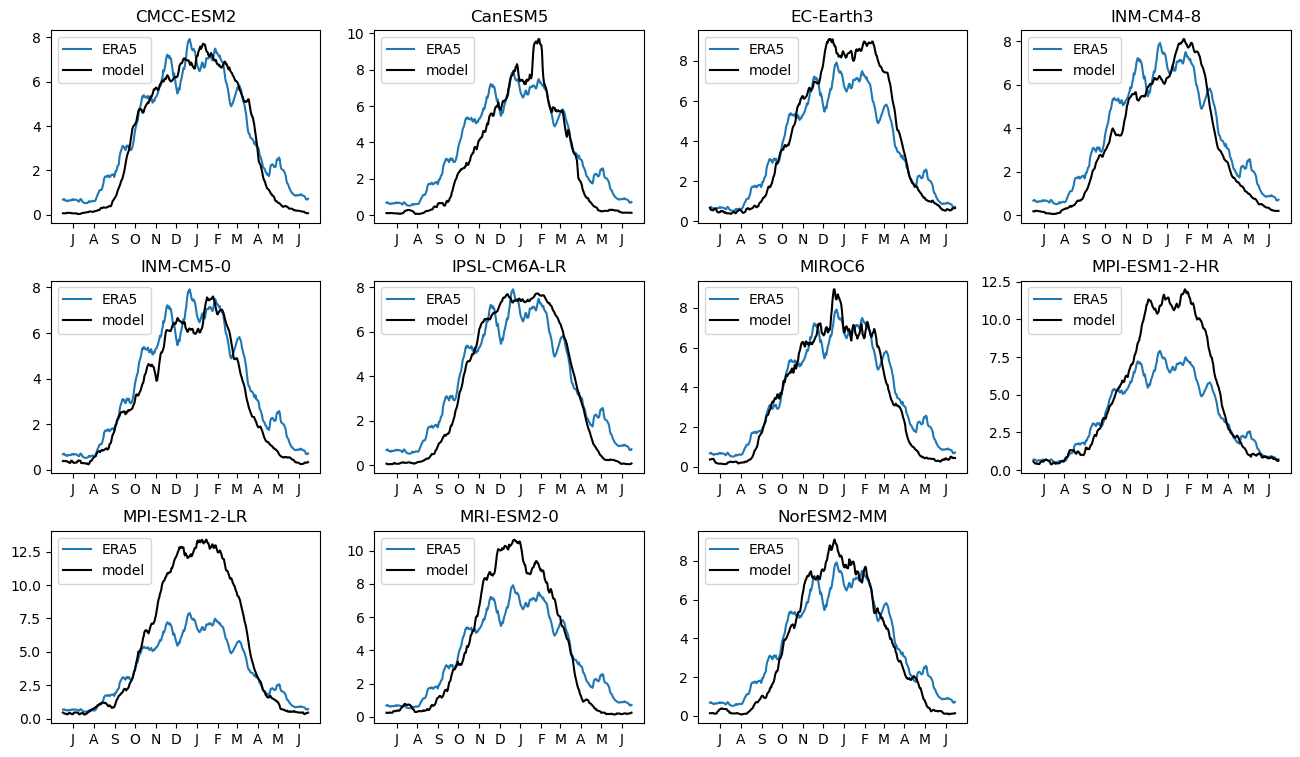

In [88]:
varnm = "pr"
smooth = 15

era5 = seasonal_cycle(xr.open_dataset("data/pr_daily_pantanal_era5.nc")[varnm], sm = smooth)
mswx = seasonal_cycle(xr.open_dataset("data/pr_daily_pantanal_mswx.nc")[varnm], sm = smooth)

fl = sorted(glob.glob("data/cmip6/"+varnm+"_*.nc"))

nc = 4; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.3)

for i in range(len(fl)):
    ax = fig.axes[i]
    sc = seasonal_cycle(xr.open_dataset(fl[i])[varnm], sm = smooth)
    
    ax.plot(era5, color = "tab:blue", label = "ERA5")
#     ax.plot(mswx, color = "darkblue")
    ax.plot(sc, color = "k", label = "model")
    
    ax.set_xticks(labelticks)
    ax.set_xticklabels(labels)
    ax.set_title(fl[i].split("_")[1])
    ax.legend()
    
for i in range(len(fl), len(fig.axes)): fig.axes[i].set_axis_off()
    
plt.savefig("mdl-eval/"+varnm+"-seasonal_cmip6.png")

### CMIP6 tasmax

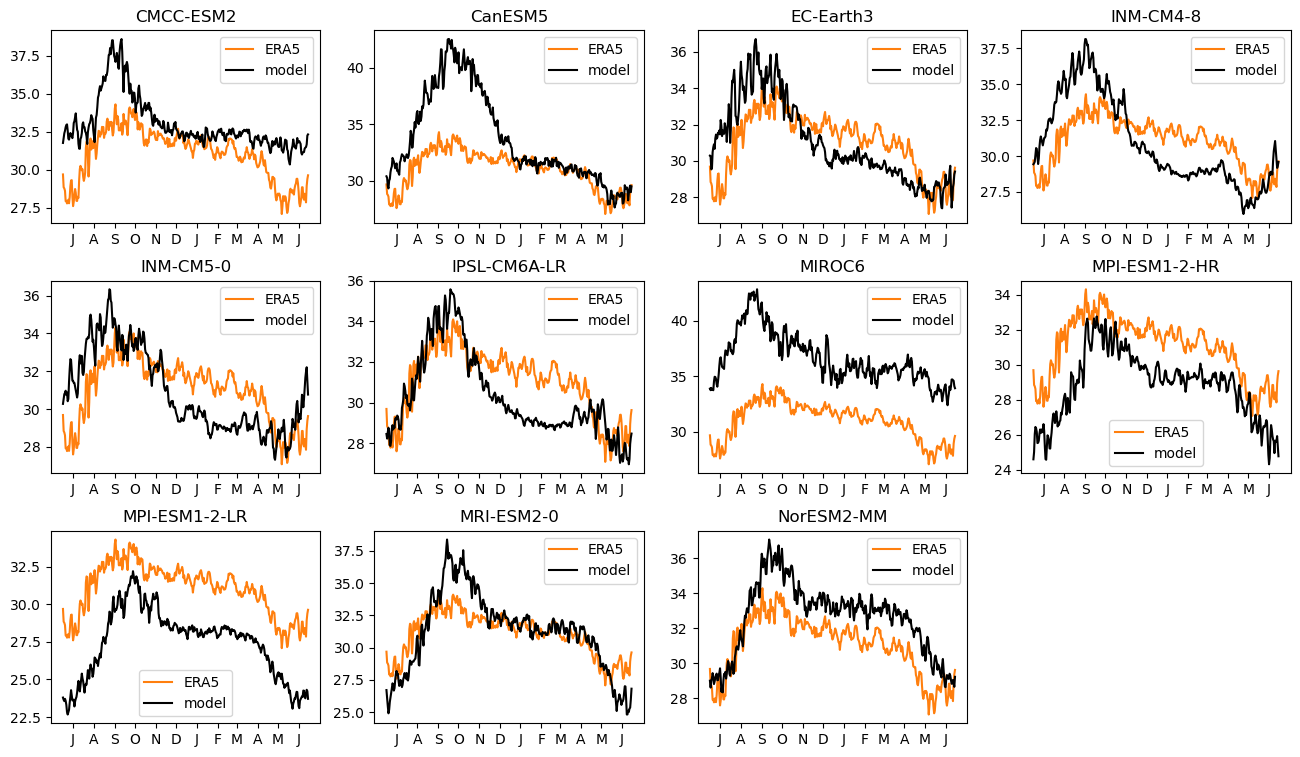

In [89]:
varnm = "tasmax"
smooth = 1

era5 = seasonal_cycle(xr.open_dataset("data/vars_daily_pantanal_era5.nc")["tmax"], sm = smooth)
mswx = seasonal_cycle(xr.open_dataset("data/vars_daily_pantanal_mswx.nc")[varnm], sm = smooth)

fl = sorted(glob.glob("data/cmip6/"+varnm+"_*.nc"))

nc = 4; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.3)

for i in range(len(fl)):
    ax = fig.axes[i]
    sc = seasonal_cycle(xr.open_dataset(fl[i])[varnm], sm = smooth)
    
    ax.plot(era5, color = "tab:orange", label = "ERA5")
#     ax.plot(mswx, color = "darkblue")
    ax.plot(sc, color = "k", label = "model")
    
    ax.set_xticks(labelticks)
    ax.set_xticklabels(labels)
    ax.set_title(fl[i].split("_")[1])
    ax.legend()
    
for i in range(len(fl), len(fig.axes)): fig.axes[i].set_axis_off()
    
plt.savefig("mdl-eval/"+varnm+"-seasonal_cmip6.png")

### CORDEX precip

In [135]:
varnm = "pr"
smooth = 15

era5 = seasonal_cycle(xr.open_dataset("data/pr_daily_pantanal_era5.nc")[varnm], sm = smooth)
mswx = seasonal_cycle(xr.open_dataset("data/pr_daily_pantanal_mswx.nc")[varnm], sm = smooth)

fl = sorted(glob.glob("data/cordex/"+varnm+"_*.nc"))

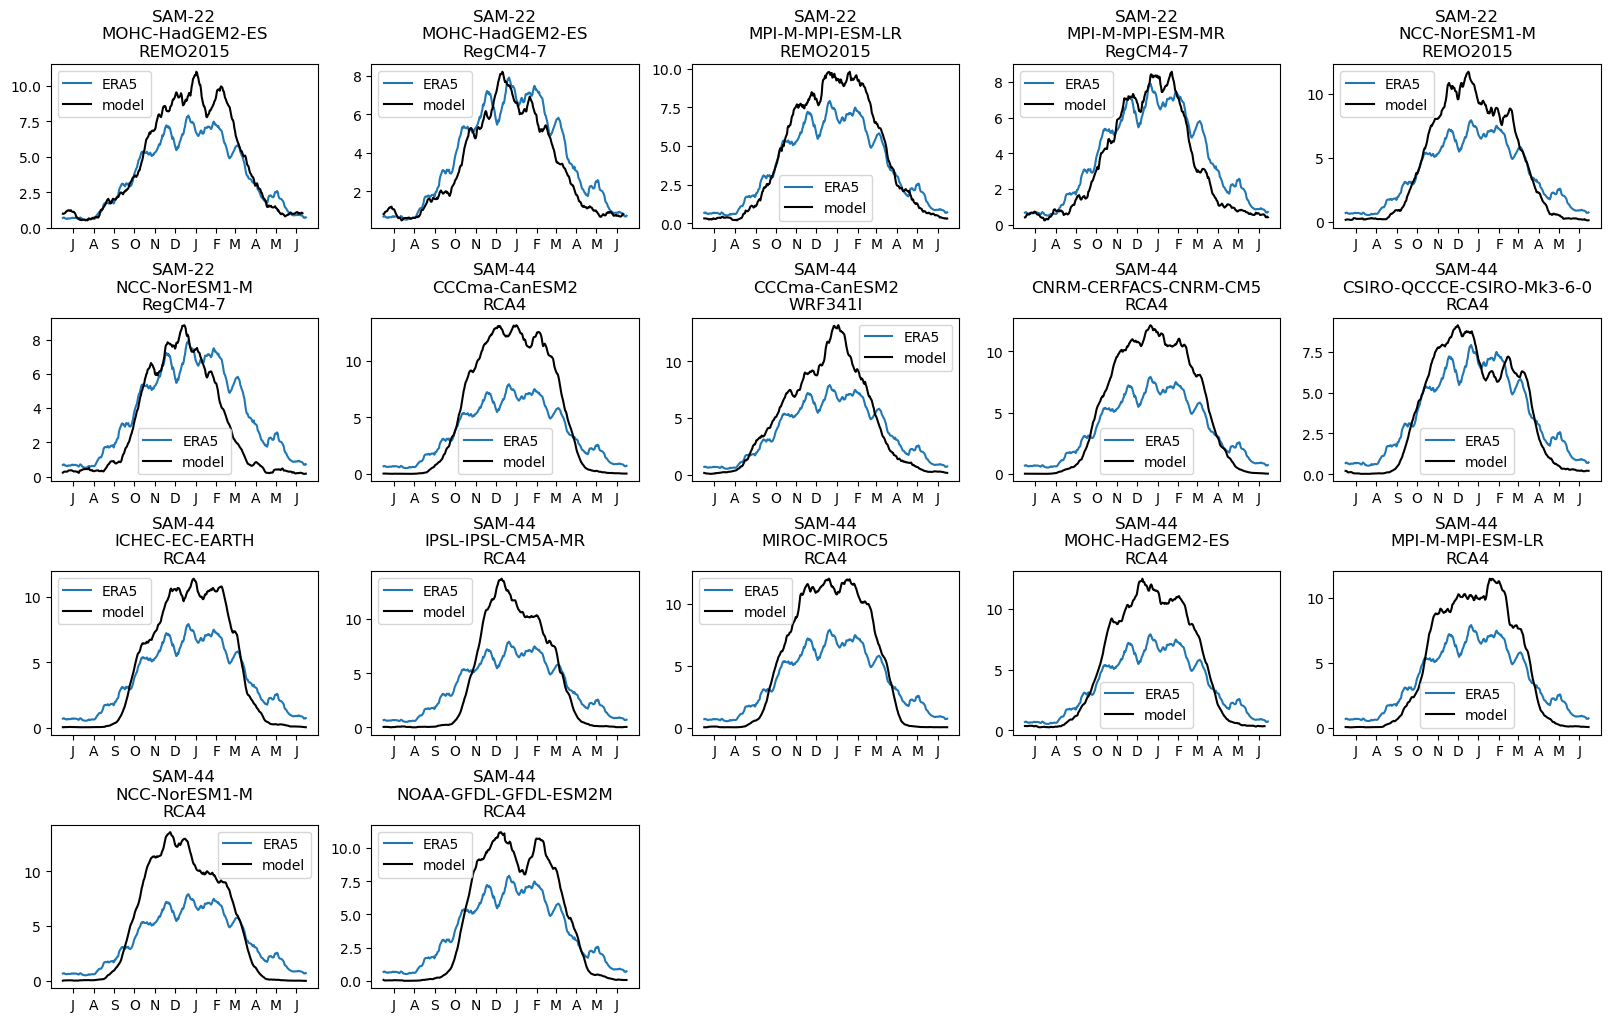

In [138]:
nc = 5; nr = 4
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.55)

for i in range(len(fl)):
    ax = fig.axes[i]
    sc = seasonal_cycle(xr.open_dataset(fl[i])[varnm], sm = smooth)
    
    ax.plot(era5, color = "tab:blue", label = "ERA5")
#     ax.plot(mswx, color = "darkblue")
    ax.plot(sc, color = "k", label = "model")
    
    ax.set_xticks(labelticks)
    ax.set_xticklabels(labels)
    ax.set_title("\n".join(fl[i].split("_")[1:3])+"\n"+re.sub(".nc", "", fl[i].split("_")[-1]))
    ax.legend()
    
for i in range(len(fl), len(fig.axes)): fig.axes[i].set_axis_off()
    
plt.savefig("mdl-eval/"+varnm+"-seasonal_cordex.png")

### CORDEX tasmax

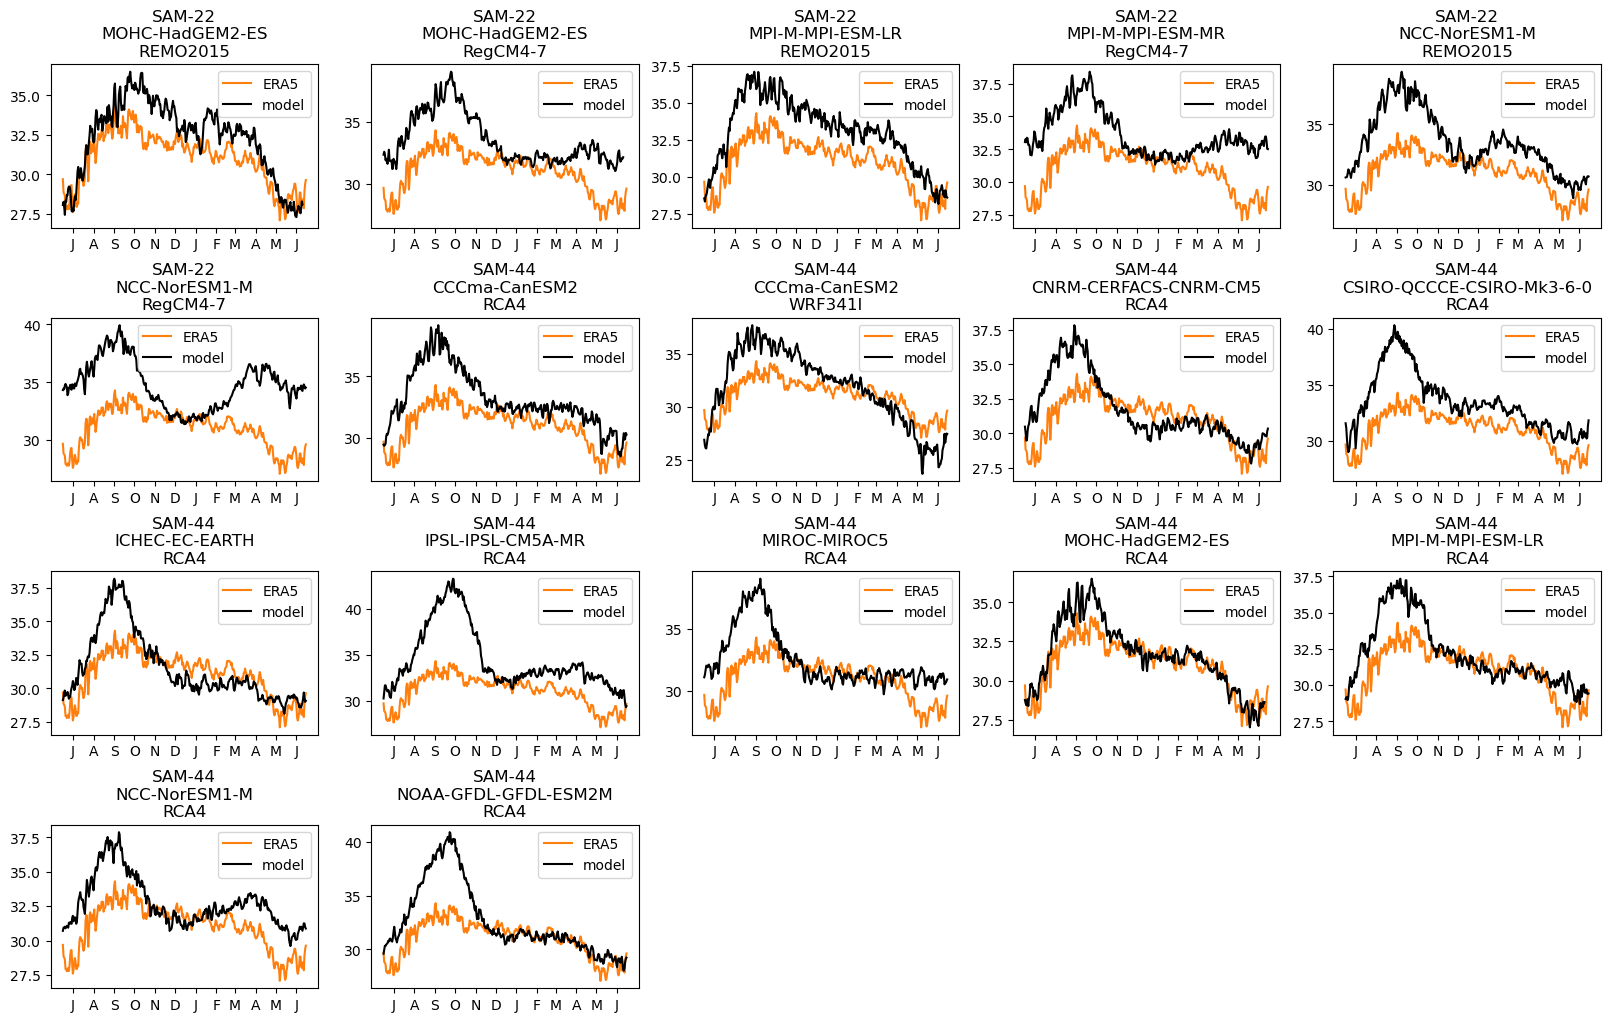

In [139]:
varnm = "tasmax"
smooth = 1

era5 = seasonal_cycle(xr.open_dataset("data/vars_daily_pantanal_era5.nc")["tmax"], sm = smooth)
mswx = seasonal_cycle(xr.open_dataset("data/vars_daily_pantanal_mswx.nc")[varnm], sm = smooth)

fl = sorted(glob.glob("data/cordex/"+varnm+"_*.nc"))

nc = 5; nr = 4
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.55)

for i in range(len(fl)):
    ax = fig.axes[i]
    sc = seasonal_cycle(xr.open_dataset(fl[i])[varnm], sm = smooth)
    
    ax.plot(era5, color = "tab:orange", label = "ERA5")
#     ax.plot(mswx, color = "darkblue")
    ax.plot(sc, color = "k", label = "model")
    
    ax.set_xticks(labelticks)
    ax.set_xticklabels(labels)
    ax.set_title("\n".join(fl[i].split("_")[1:3])+"\n"+re.sub(".nc", "", fl[i].split("_")[-1]))
    ax.legend()
    
for i in range(len(fl), len(fig.axes)): fig.axes[i].set_axis_off()
    
plt.savefig("mdl-eval/"+varnm+"-seasonal_cordex.png")

## Spatial pattern

### CMIP6 precip

In [117]:
varnm = "pr"

In [34]:
era5 = decode_times(xr.open_dataset("data/era5_prcp_daily_-1_sum_30_-67--47E_-27--7N.nc", decode_times = False)).tp.resample(time = "AS").sum().sel(time = slice("1990","2020")).mean("time")

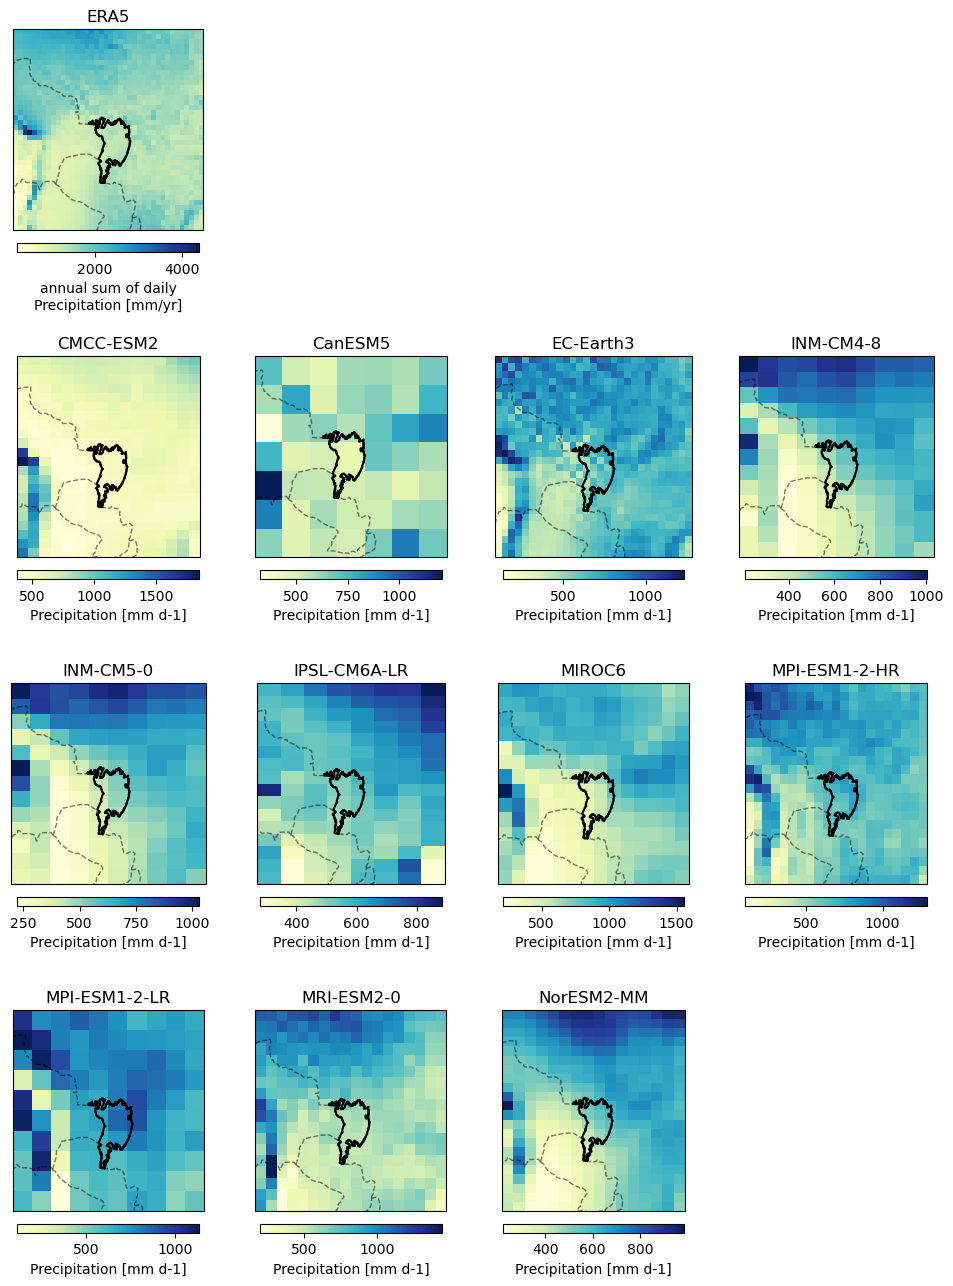

In [36]:
fl = sorted(glob.glob("data/cmip6/"+varnm+"-spatial_*.nc"))

nr = 4; nc = 4; 
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 3, nr * 4), dpi = 100, subplot_kw = {"projection" : mapproj})
plt.subplots_adjust(hspace = 0.3)
plot_kwargs = {"cmap" : "YlGnBu", "cbar_kwargs" : {"location" : "bottom", "pad" : 0.05, "shrink" : 0.9}}

ax = axs[0,0]
era5.plot(ax = ax, **plot_kwargs)
ax.set_title("ERA5")
sf.boundary.plot(ax = ax, color = "k")
ax.add_feature(cartopy.feature.BORDERS, color = "k", ls = "--", alpha = 0.5)

for ax in axs[0,1:]: ax.set_axis_off()
    
for i in range(len(fl)):
    
    ax = fig.axes[i+nc]
    da = xr.open_dataset(fl[i]).sum("month")[varnm]*12
    da.plot(ax = ax, **plot_kwargs)
    sf.boundary.plot(ax = ax, color = "k")
    ax.add_feature(cartopy.feature.BORDERS, color = "k", ls = "--", alpha = 0.5)
    ax.set_title(fl[i].split("_")[1])
    
axs[-1,-1].set_axis_off()
# for i in range(len(fl)+nc, len(fig.axes)): fig.axes[i].set_axis_off()
plt.savefig("mdl-eval/"+varnm+"-spatial_cmip6.png")

### CORDEX precip

In [38]:
varnm = "pr"

In [39]:
era5 = decode_times(xr.open_dataset("data/era5_prcp_daily_-1_sum_30_-67--47E_-27--7N.nc", decode_times = False)).tp.resample(time = "AS").sum().sel(time = slice("1990","2020")).mean("time")

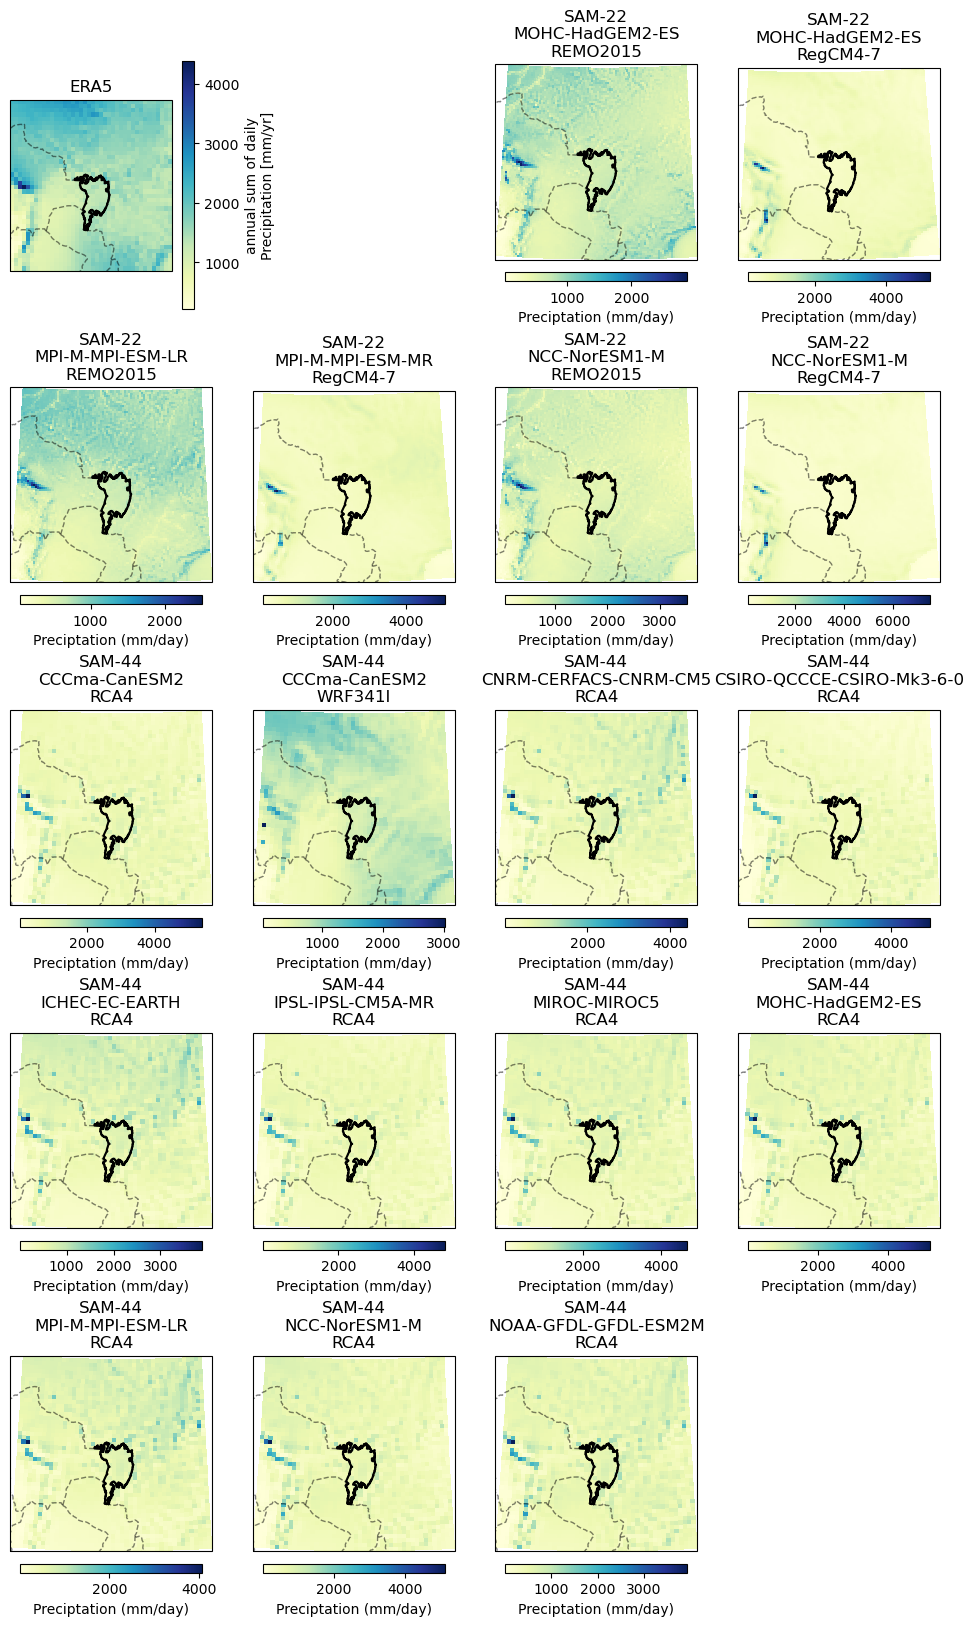

In [40]:
fl = sorted(glob.glob("data/cordex/"+varnm+"-spatial_*.nc"))

nr = 5; nc = 4; 
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 3, nr * 4), dpi = 100, subplot_kw = {"projection" : mapproj})
plt.subplots_adjust(hspace = 0.3)
plot_kwargs = {"cmap" : "YlGnBu"}
cbar_kwargs = {"location" : "bottom", "pad" : 0.05, "shrink" : 0.9}

ax = axs[0,0]
era5.plot(ax = ax, **plot_kwargs)
ax.set_title("ERA5")
sf.boundary.plot(ax = ax, color = "k")
ax.add_feature(cartopy.feature.BORDERS, color = "k", ls = "--", alpha = 0.5)
ax_os = 2
for ax in axs[0,1:2]: ax.set_axis_off()
    
for i in range(len(fl)):
    
    ax = fig.axes[i+ax_os]
    da = xr.open_dataset(fl[i]).sum("month")[varnm]*12
    cbar = ax.pcolormesh(da.lon, da.lat, da, **plot_kwargs)
    plt.colorbar(cbar, ax = ax, **cbar_kwargs, label = "Preciptation (mm/day)")
    sf.boundary.plot(ax = ax, color = "k")
    ax.add_feature(cartopy.feature.BORDERS, color = "k", ls = "--", alpha = 0.5)
    ax.set_title("\n".join(fl[i].split("_")[1:3])+"\n"+re.sub(".nc", "", fl[i].split("_")[-1]))
    
axs[-1,-1].set_axis_off()
plt.savefig("mdl-eval/"+varnm+"-spatial_cordex.png")

# Taylor diagrams

## Seasonal cycle

In [122]:
def qsc(ts, sm = 1) : return ts.rolling(time = sm, center = True).mean().sel(time = slice("1990","2020")).groupby("time.dayofyear").mean().isel(dayofyear = slice(0,365))

In [126]:
varnm = "tasmax"

if varnm == "pr":
    smooth = 15
    vnm = "precipitation"
    era5 = qsc(xr.open_dataset("data/pr_daily_pantanal_era5.nc")[varnm], sm = smooth)
    mswx = qsc(xr.open_dataset("data/pr_daily_pantanal_mswx.nc")[varnm], sm = smooth)
elif varnm == "tasmax":
    smooth = 1
    vnm = "daily maximum temperatures"
    era5 = qsc(xr.open_dataset("data/vars_daily_pantanal_era5.nc")["tmax"], sm = smooth)
    mswx = qsc(xr.open_dataset("data/vars_daily_pantanal_mswx.nc")[varnm], sm = smooth)

In [127]:
cmip6 = xr.concat([qsc(xr.open_dataset(fnm)[varnm]).expand_dims(mdl = [fnm.split("_")[1]]) for fnm in sorted(glob.glob("data/cmip6/"+varnm+"_*.nc"))], "mdl")
cmip6_corrs, cmip6_sds, ref_sd = taylor_scores(cmip6, era5)

cordex = xr.concat([qsc(xr.open_dataset(fnm)[varnm]).expand_dims(mdl = ["_".join(fnm.split("_")[1:3]+re.sub(".nc", "", fnm).split("_")[4:5])]) for fnm in sorted(glob.glob("data/cordex/"+varnm+"_*.nc"))], "mdl")
cordex_corrs, cordex_sds, ref_sd = taylor_scores(cordex, era5)

mswx_corr, mswx_sd, ref_sd = taylor_scores(mswx, era5)
chirps_corr, chirps_sd, ref_sd = taylor_scores(chirps, era5)

max_sd = max(np.ceil(max(list(cmip6_sds) + list(cordex_sds) + [mswx_sd]) / ref_sd), 1.1)

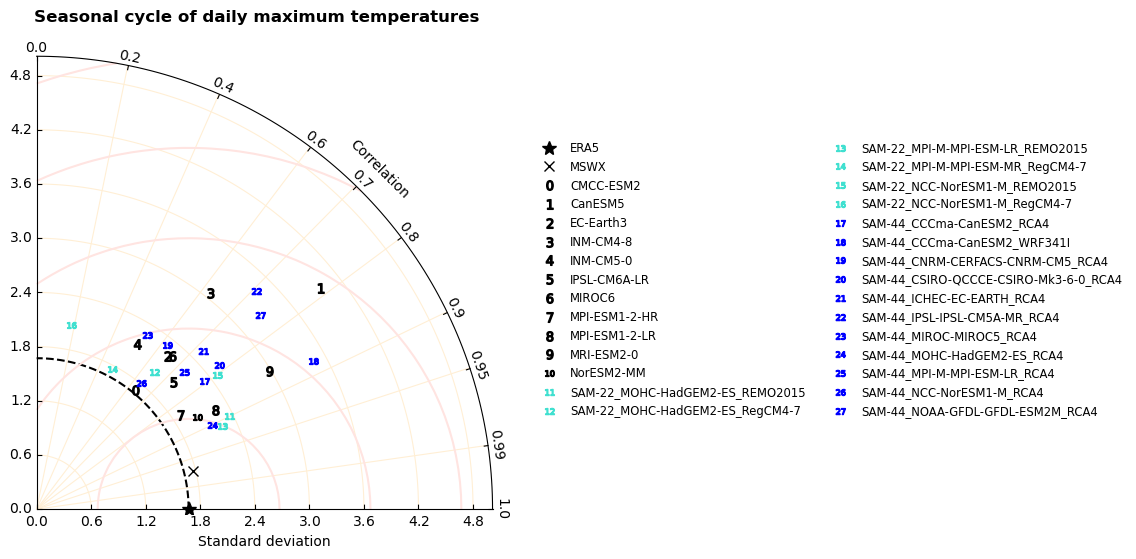

In [128]:
# make Taylor diagram
fig = plt.figure(figsize = (6,6), dpi= 100, facecolor='w', edgecolor='k')
td = TaylorDiagram(ref_sd, fig = fig, label = "ERA5", srange = (0, max_sd), extend = False)

td.add_contours(colors = "mistyrose") # lines of equal RMSE
td.add_grid(color = "papayawhip")  # lines of equal correlation & SD

td.add_sample(mswx_sd, mswx_corr, marker = "x", ms = 7, ls = '', mfc = "k", mec = "k", label = "MSWX", zorder = 9)

for i in range(len(cmip6_corrs)): td.add_sample(cmip6_sds[i], cmip6_corrs[i], marker = "$"+str(i)+"$", ms = 7, ls = '', mfc = "k", mec = "k", label = cmip6.mdl.values[i], zorder = 9)
    
for i in range(len(cordex_corrs)): 
    mdl = cordex.mdl.values[i]
    if "22" in mdl:
        mcol = "turquoise"
    else:
        mcol = "blue"
    td.add_sample(cordex_sds[i], cordex_corrs[i], marker = "$"+str(len(cmip6_corrs) + i)+"$", ms = 7, ls = '', c = mcol, label = cordex.mdl.values[i], zorder = 9)

fig.legend(td.samplePoints, [ p.get_label() for p in td.samplePoints ], numpoints=1, prop=dict(size='small'), loc='center left', bbox_to_anchor = (0.95,0.5), ncols = 2, edgecolor = "w")
plt.suptitle("Seasonal cycle of "+vnm, fontweight = "bold", y = 0.95)

plt.savefig("mdl-eval/td_"+varnm+"-seasonal.png")

# Trends in model vs obs precip

### CORDEX

In [29]:
obs = [pd.read_csv("ts_obs/pantanal-fires_pr-jj_"+ds+".dat", comment = "#", sep = " ", engine = "python", header = None, names = ["year", "pr"], index_col = 0) for ds in ["era5", "era5-1979", "mswx", "chirps"]]

cmip6_fl = sorted(glob.glob("ts_cmip6/*pr-jj*"))
cordex_fl = sorted(glob.glob("ts_cordex/*pr-jj*"))

cmip6 = [pd.read_csv(fnm, comment = "#", sep = " ", engine = "python", header = None, names = ["year", "pr"], index_col = 0) for fnm in cmip6_fl]
cordex = [pd.read_csv(fnm, comment = "#", sep = " ", engine = "python", header = None, names = ["year", "pr"], index_col = 0) for fnm in cordex_fl]

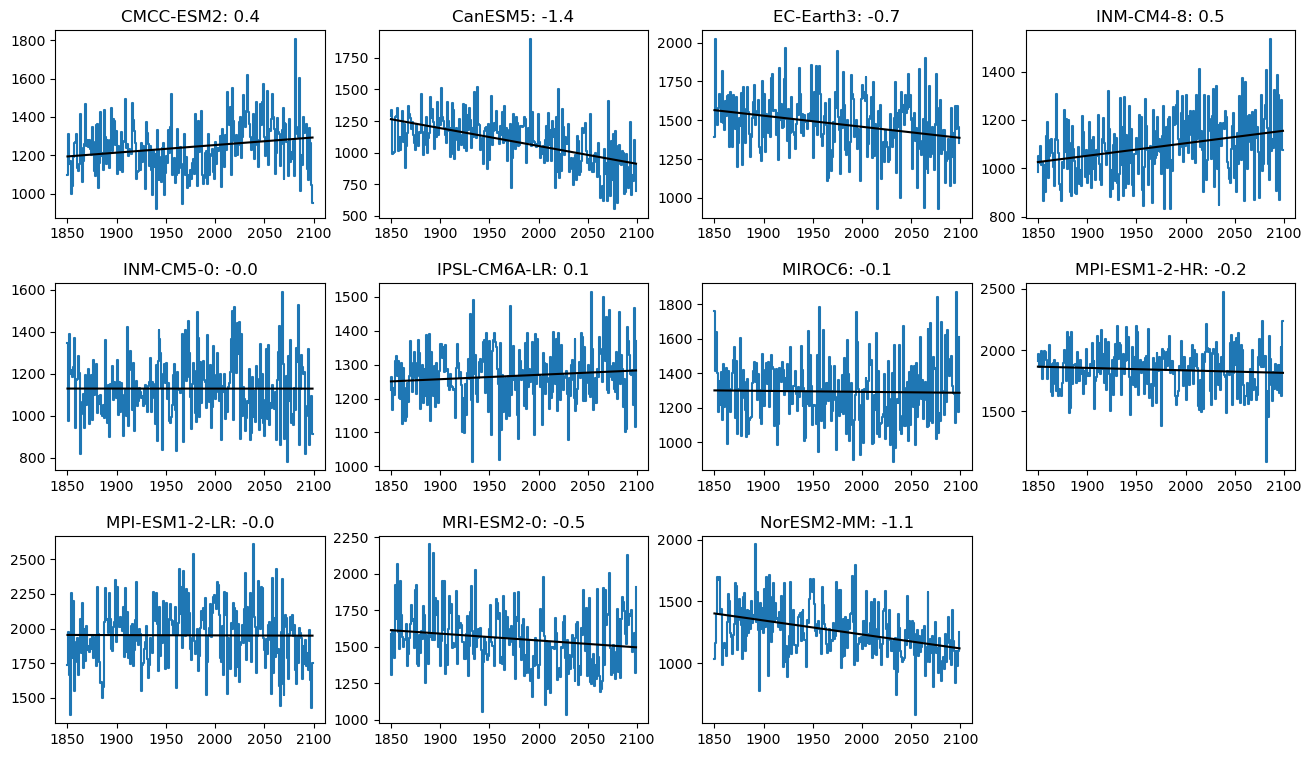

In [42]:
nc = 4; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.35)

for i in range(len(cmip6)):
    ax = fig.axes[i]
    df = cmip6[i]
    
    a,b = np.polyfit(df.index, df.pr, 1)
    
    df.plot(ax = ax, drawstyle = "steps-mid", legend = False)
    xyline(df.index, df.pr, ax = ax, color = "k")
    ax.set_xlabel("")
    ax.set_title(re.sub(".dat","",cmip6_fl[i]).split("_")[-1]+": "+str(round(a,1)))
    
    
for i in range(len(cmip6), len(fig.axes)): fig.axes[i].set_axis_off()

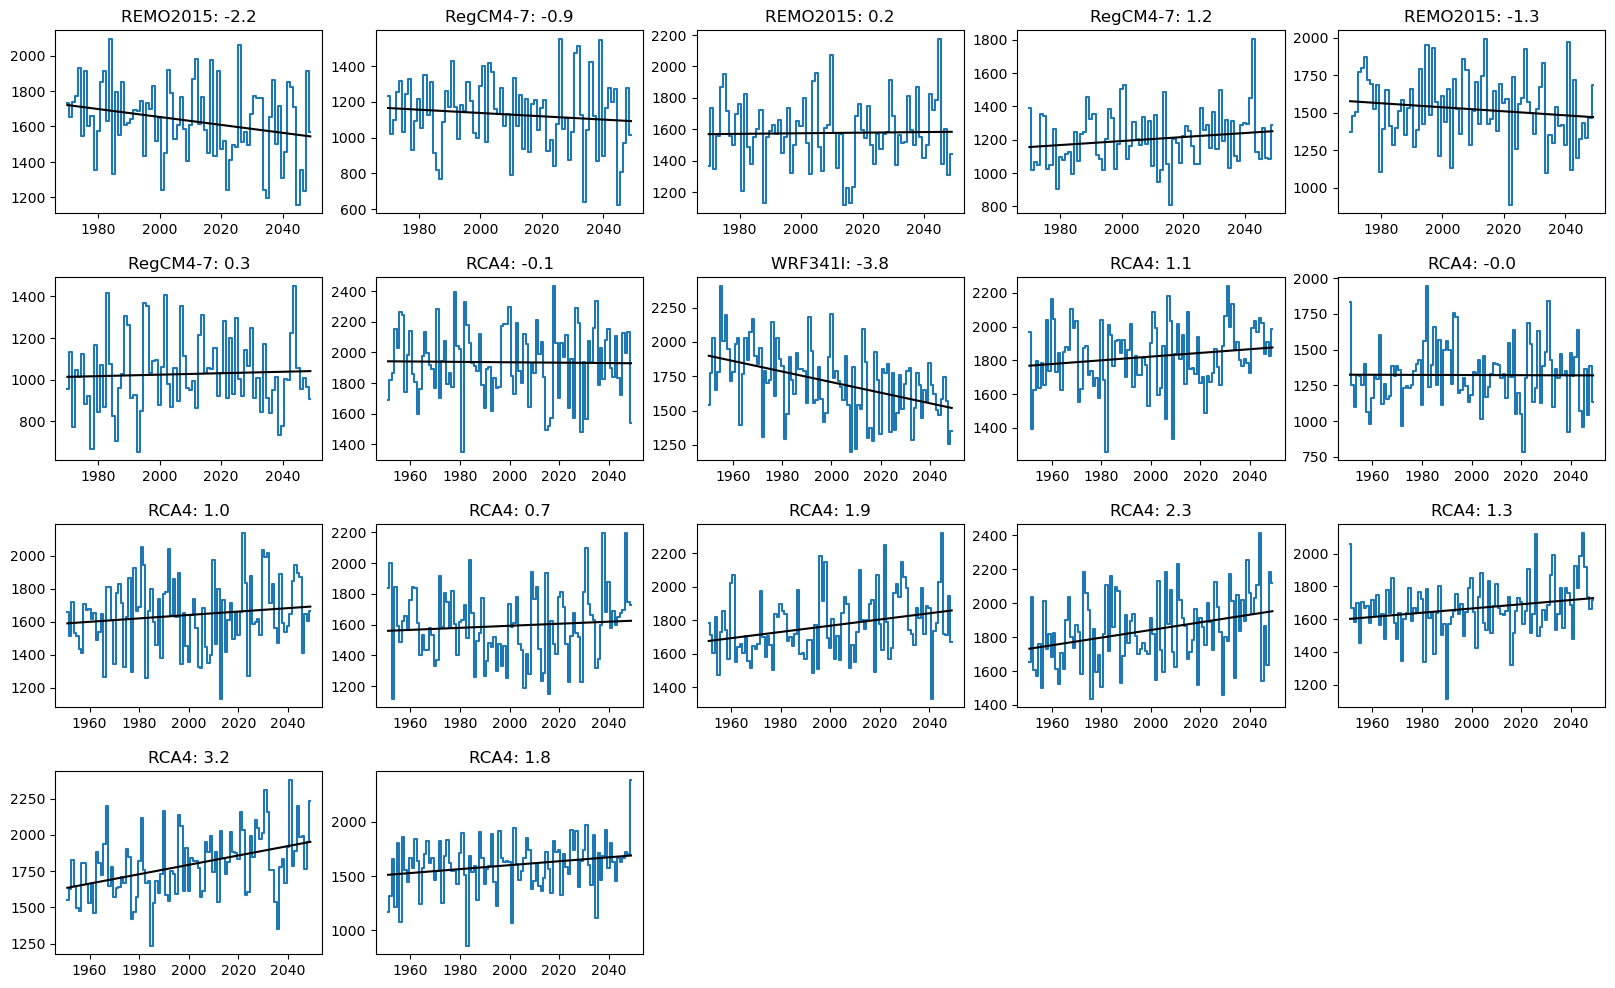

In [45]:
nc = 5; nr = 4
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.35)

for i in range(len(cordex)):
    ax = fig.axes[i]
    df = cordex[i]
    
    a,b = np.polyfit(df.index, df.pr, 1)
    
    df.plot(ax = ax, drawstyle = "steps-mid", legend = False)
    xyline(df.index, df.pr, ax = ax, color = "k")
    ax.set_xlabel("")
    ax.set_title(re.sub(".dat","",cordex_fl[i]).split("_")[-1]+": "+str(round(a,1)))
    
    
for i in range(len(cordex), len(fig.axes)): fig.axes[i].set_axis_off()